PROBLEM STATEMENT:
TO CLASSIFY WINES INTO DIFFERENT QUALITY CATEGORIES BASED ON THEIR PHYSICOCHEMICAL PROPERTIES 

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the dataset
wine_data = pd.read_csv(r'C:\Users\bhagyashree\Downloads\wine+quality\winequality-red.csv', delimiter=';')


In [4]:
# Display the first few rows of the dataset
print("--First few rows of the dataset:")
print(wine_data.head())

# Checking for missing values
print("\n--Missing values in the dataset:")
print(wine_data.isnull().sum())

# Statistical summary of the dataset
print("\n--Statistical summary of the dataset:")
print(wine_data.describe())


--First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.

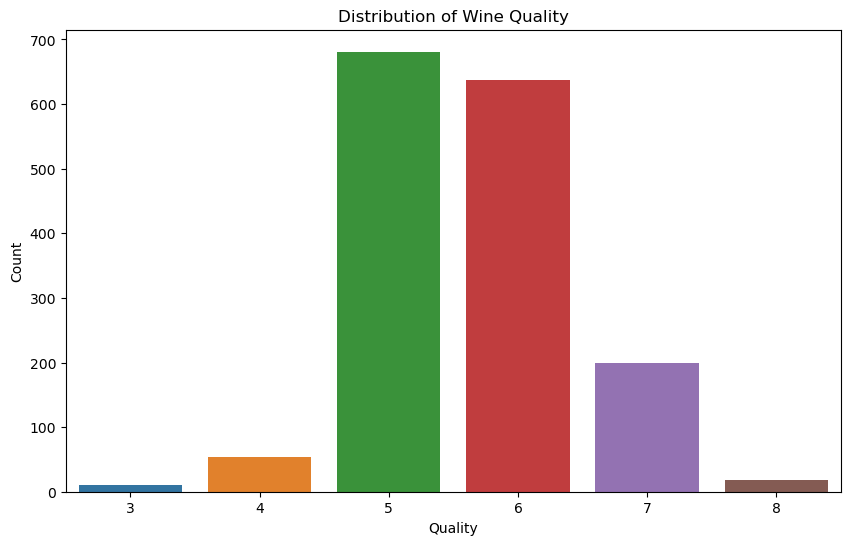

In [5]:
# Visualizing the distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


In [6]:
# Separating features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Training the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluating the model
print("\nModel evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nModel evaluation with best parameters:")
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))
print("Classification Report with Best Model:\n", classification_report(y_test, y_pred_best, zero_division=1))
print("Confusion Matrix with Best Model:\n", confusion_matrix(y_test, y_pred_best))



Model evaluation:
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      1.00        10
           5       0.71      0.74      0.72       130
           6       0.62      0.68      0.65       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      1.00         5

    accuracy                           0.65       320
   macro avg       0.49      0.32      0.66       320
weighted avg       0.63      0.65      0.68       320

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  1 32 90  8  1]
 [ 0  0  0 19 22  1]
 [ 0  0  0  1  4  0]]
Fitting 5 folds for each of 108 candidates, totalling 540 fits
